<a href="https://colab.research.google.com/github/Chirag314/Tabular-Data-Series/blob/main/TPMay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

######Reference  https://www.kaggle.com/code/ambrosm/tpsmay22-eda-which-makes-sense


In [58]:
# Tabular play ground series May.
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import KFold 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.inspection import PartialDependenceDisplay
from lightgbm import LGBMClassifier
import warnings, gc, string, random
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff


In [30]:
# Train data
train = pd.read_csv('/content/train.csv', sep=',', index_col='id')
train1=train.copy()       #Copy training data in case we need original data later.
train.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [31]:
# Test data
test = pd.read_csv('/content/test.csv',sep=',',index_col='id')
test.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
id,,,,,,,,,,,,,,,,,,,,,
900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [32]:
# Check data
train.info()
# It seems all except f_27 are float type . F_27 is object string type. Also there are no missing values in any columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f_00    900000 non-null  float64
 1   f_01    900000 non-null  float64
 2   f_02    900000 non-null  float64
 3   f_03    900000 non-null  float64
 4   f_04    900000 non-null  float64
 5   f_05    900000 non-null  float64
 6   f_06    900000 non-null  float64
 7   f_07    900000 non-null  int64  
 8   f_08    900000 non-null  int64  
 9   f_09    900000 non-null  int64  
 10  f_10    900000 non-null  int64  
 11  f_11    900000 non-null  int64  
 12  f_12    900000 non-null  int64  
 13  f_13    900000 non-null  int64  
 14  f_14    900000 non-null  int64  
 15  f_15    900000 non-null  int64  
 16  f_16    900000 non-null  int64  
 17  f_17    900000 non-null  int64  
 18  f_18    900000 non-null  int64  
 19  f_19    900000 non-null  float64
 20  f_20    900000 non-null  float64
 21  f_21    90

In [33]:
train.describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,2.362431,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,1.637706,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,14.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


In [34]:
# Check column names and types
print(' Column names are : {}'.format(train.columns))

print(' Column types are : {}'.format(train.dtypes))

 Column names are : Index(['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08',
       'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17',
       'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26',
       'f_27', 'f_28', 'f_29', 'f_30', 'target'],
      dtype='object')
 Column types are : f_00      float64
f_01      float64
f_02      float64
f_03      float64
f_04      float64
f_05      float64
f_06      float64
f_07        int64
f_08        int64
f_09        int64
f_10        int64
f_11        int64
f_12        int64
f_13        int64
f_14        int64
f_15        int64
f_16        int64
f_17        int64
f_18        int64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23      float64
f_24      float64
f_25      float64
f_26      float64
f_27       object
f_28      float64
f_29        int64
f_30        int64
target      int64
dtype: object


In [35]:
train.select_dtypes(['float64']).head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28
id,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,67.609153
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,377.096415
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,-195.599702
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,210.826205
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,-217.211798


In [36]:
#Convert float to int for memory saving and fast execution
float_list_train = train.select_dtypes(include=[np.float64]).columns
train[float_list_train] = train[float_list_train].astype(np.float32)
int_list_train = train.select_dtypes(include=[np.int64]).columns
train[int_list_train] = train[int_list_train].astype(np.int16)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f_00    900000 non-null  float32
 1   f_01    900000 non-null  float32
 2   f_02    900000 non-null  float32
 3   f_03    900000 non-null  float32
 4   f_04    900000 non-null  float32
 5   f_05    900000 non-null  float32
 6   f_06    900000 non-null  float32
 7   f_07    900000 non-null  int16  
 8   f_08    900000 non-null  int16  
 9   f_09    900000 non-null  int16  
 10  f_10    900000 non-null  int16  
 11  f_11    900000 non-null  int16  
 12  f_12    900000 non-null  int16  
 13  f_13    900000 non-null  int16  
 14  f_14    900000 non-null  int16  
 15  f_15    900000 non-null  int16  
 16  f_16    900000 non-null  int16  
 17  f_17    900000 non-null  int16  
 18  f_18    900000 non-null  int16  
 19  f_19    900000 non-null  float32
 20  f_20    900000 non-null  float32
 21  f_21    90

In [37]:
train.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609154,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096405,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599701,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826202,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211792,0,1,1


In [38]:
#Convert float to int for memory saving and fast execution for test data also
float_list_test = test.select_dtypes(include=[np.float64]).columns
float_list_test
test[float_list_test] = test[float_list_test].astype(np.float32)
int_list_test = test.select_dtypes(include=[np.int64]).columns
test[int_list_test] = test[int_list_test].astype(np.int16)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700000 entries, 900000 to 1599999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f_00    700000 non-null  float32
 1   f_01    700000 non-null  float32
 2   f_02    700000 non-null  float32
 3   f_03    700000 non-null  float32
 4   f_04    700000 non-null  float32
 5   f_05    700000 non-null  float32
 6   f_06    700000 non-null  float32
 7   f_07    700000 non-null  int16  
 8   f_08    700000 non-null  int16  
 9   f_09    700000 non-null  int16  
 10  f_10    700000 non-null  int16  
 11  f_11    700000 non-null  int16  
 12  f_12    700000 non-null  int16  
 13  f_13    700000 non-null  int16  
 14  f_14    700000 non-null  int16  
 15  f_15    700000 non-null  int16  
 16  f_16    700000 non-null  int16  
 17  f_17    700000 non-null  int16  
 18  f_18    700000 non-null  int16  
 19  f_19    700000 non-null  float32
 20  f_20    700000 non-null  float32
 21  f_21

In [39]:
test.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
id,,,,,,,,,,,,,,,,,,,,,
900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734204,BAAABADLAC,99.478416,0,0
900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993828,1,0
900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405624,0,1
900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293457,0,0
900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,...,0.084906,-0.985736,-0.130467,-3.557894,1.210687,1.861884,AEBBBBDABF,25.629416,0,2


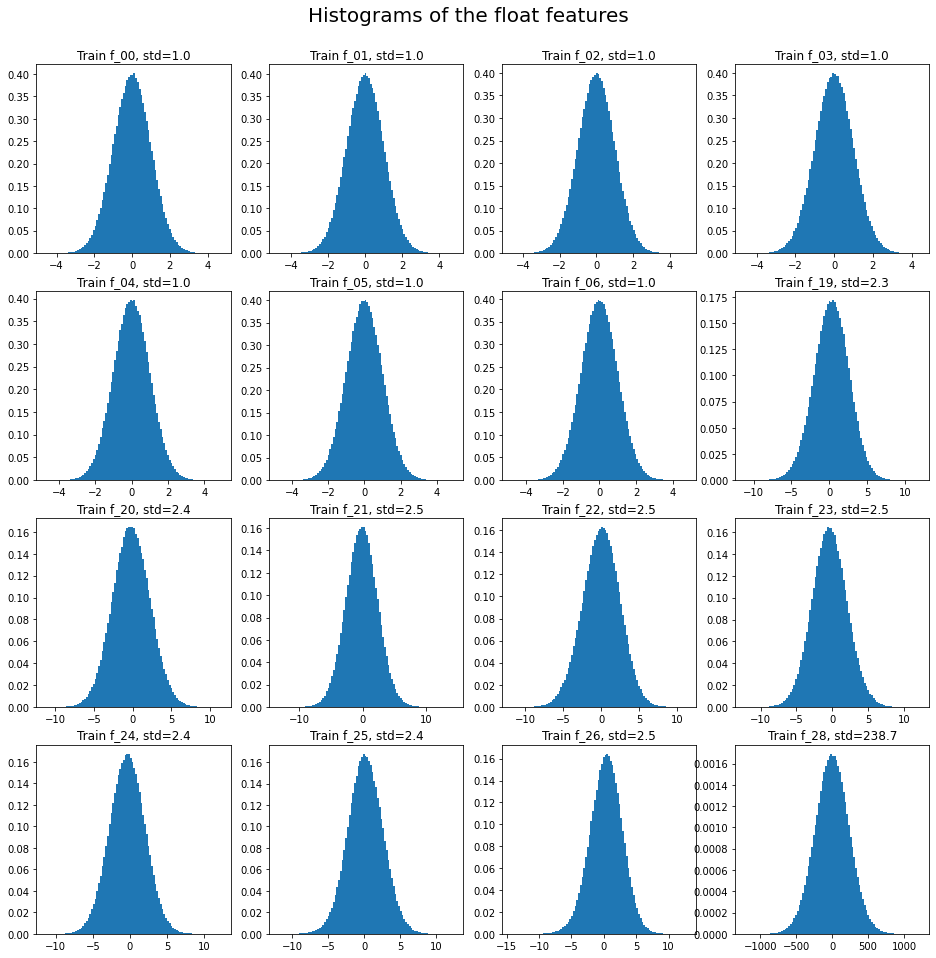

In [40]:
# Check out distribution of features using diagram
# Check float features

fig, axs = plt.subplots(4,4 ,figsize=(16,16))
for f, ax in zip(float_list_train,axs.ravel()):
  ax.hist(train[f], density=True, bins=100)
  ax.set_title(f'Train {f}, std={train[f].std():.1f}')
plt.suptitle('Histograms of the float features',y=0.93,fontsize=20)
plt.show()


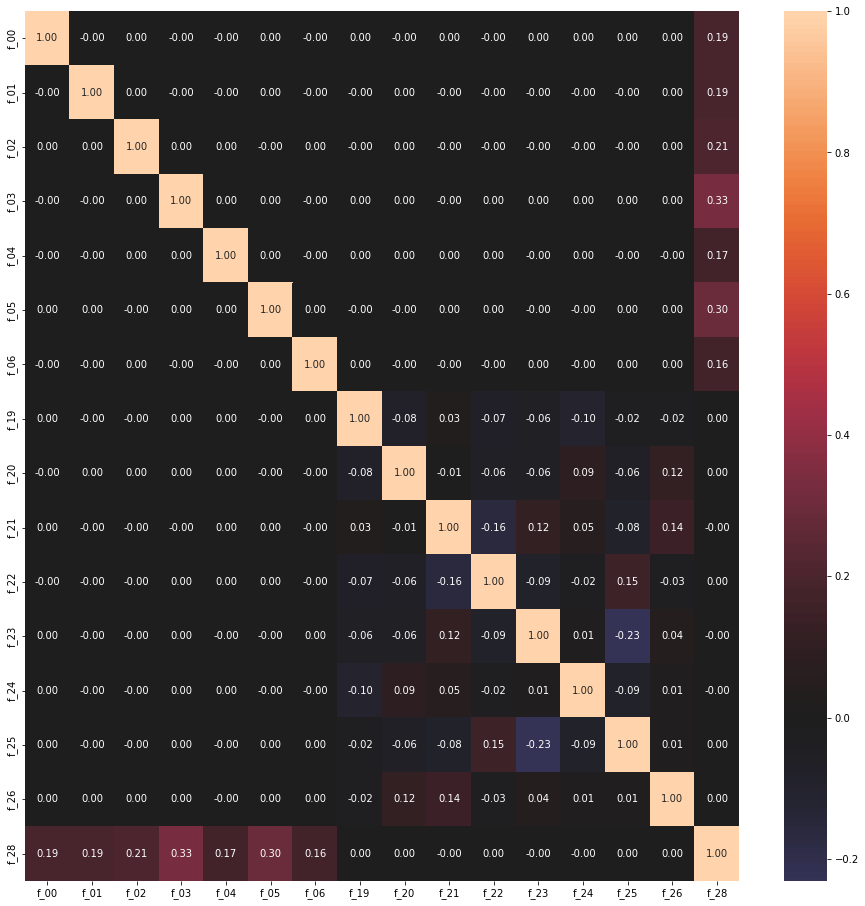

In [41]:
# Correlation matrix of float features
plt.figure(figsize=(16,16))
sns.heatmap(train[float_list_train].corr(),center=0,annot=True,fmt='.2f')

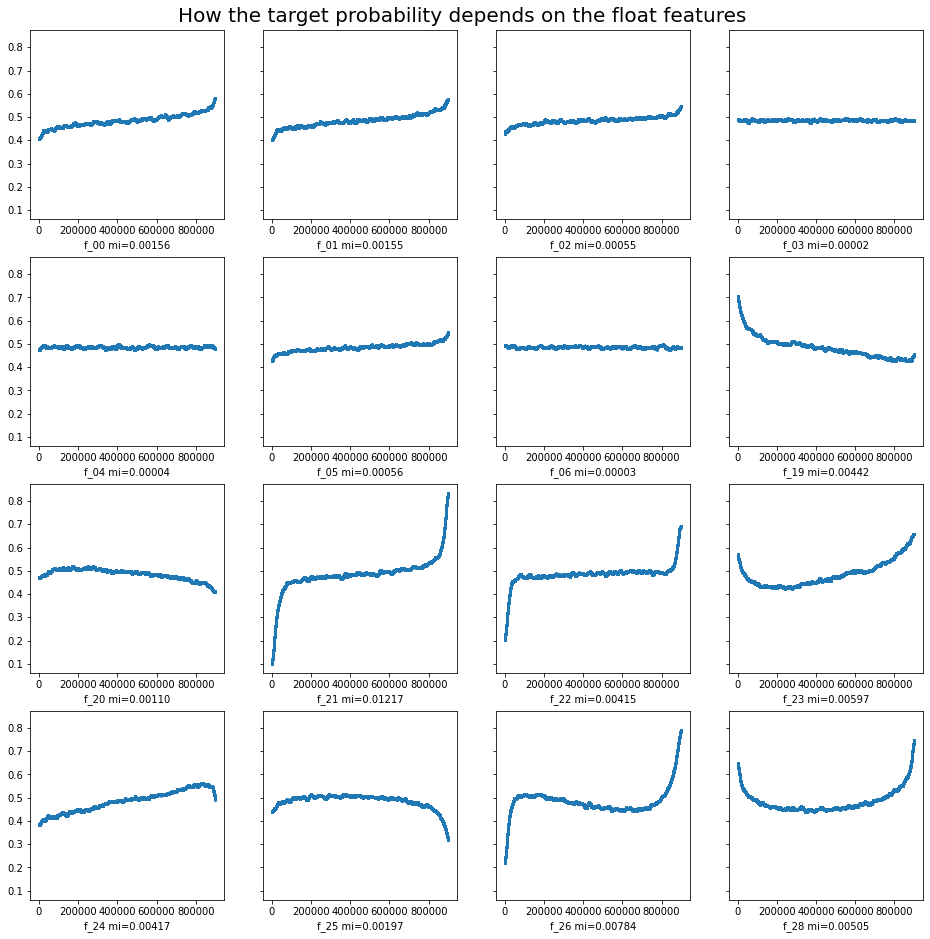

In [42]:
# Plot dependence between every feature and the target
def plot_mutual_info_diagram(df, features, ncols=4, by_quantile=True, mutual_info=True,
                             title='How the target probability depends on single features'):
    def H(p):
        """Entropy of a binary random variable in nat"""
        return -np.log(p) * p - np.log(1-p) * (1-p)
                 
    nrows = (len(features) + ncols - 1) // ncols
    fig, axs = plt.subplots(nrows, ncols, figsize=(16, nrows*4), sharey=True)
    for f, ax in zip(features, axs.ravel()):
        temp = pd.DataFrame({f: df[f].values,
                             'state': df.target.values})
        temp = temp.sort_values(f)
        temp.reset_index(inplace=True)
        rolling_mean = temp.state.rolling(15000, center=True, min_periods=1).mean()
        if by_quantile:
            ax.scatter(temp.index, rolling_mean, s=2)
        else:
            ax.scatter(temp[f], rolling_mean, s=2)
        if mutual_info and by_quantile:
            ax.set_xlabel(f'{f} mi={H(temp.state.mean()) - H(rolling_mean[~rolling_mean.isna()].values).mean():.5f}')
        else:
            ax.set_xlabel(f'{f}')
    plt.suptitle(title, y=0.90, fontsize=20)
    plt.show()

plot_mutual_info_diagram(train, float_list_train,
                         title='How the target probability depends on the float features')

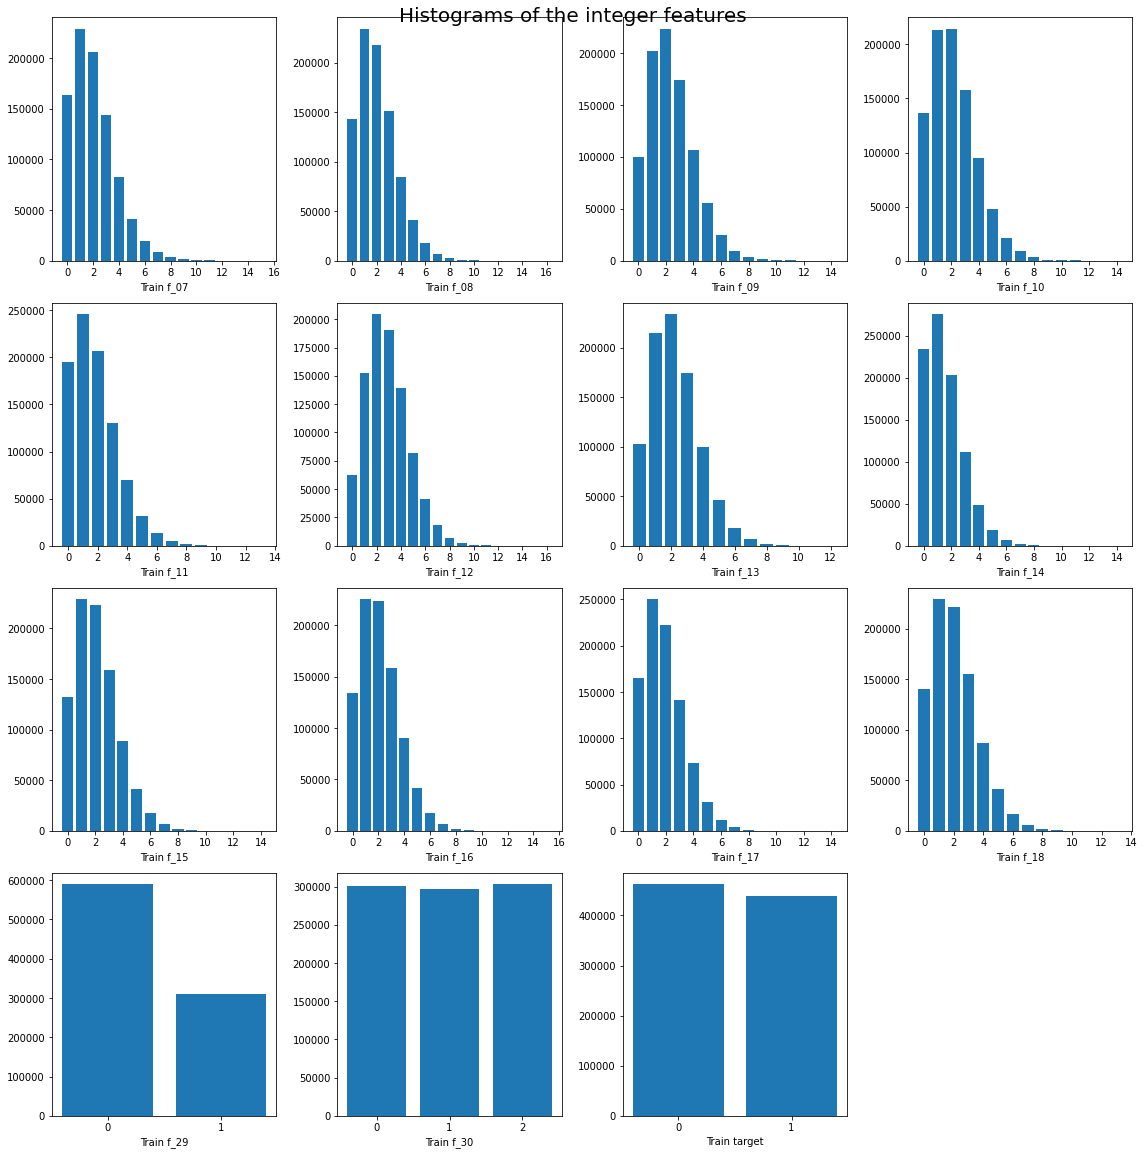

In [43]:
#Check integerfeatures
# Training histograms

from matplotlib.ticker import MaxNLocator

figure = plt.figure(figsize=(16, 16))

for i, f in enumerate(int_list_train):
    plt.subplot(4, 4, i+1)
    ax = plt.gca()
    vc = train[f].value_counts()
    ax.bar(vc.index, vc)
    
    ax.set_xlabel(f'Train {f}')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
plt.suptitle('Histograms of the integer features', y=1.0, fontsize=20)
figure.tight_layout(h_pad=1.0)
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


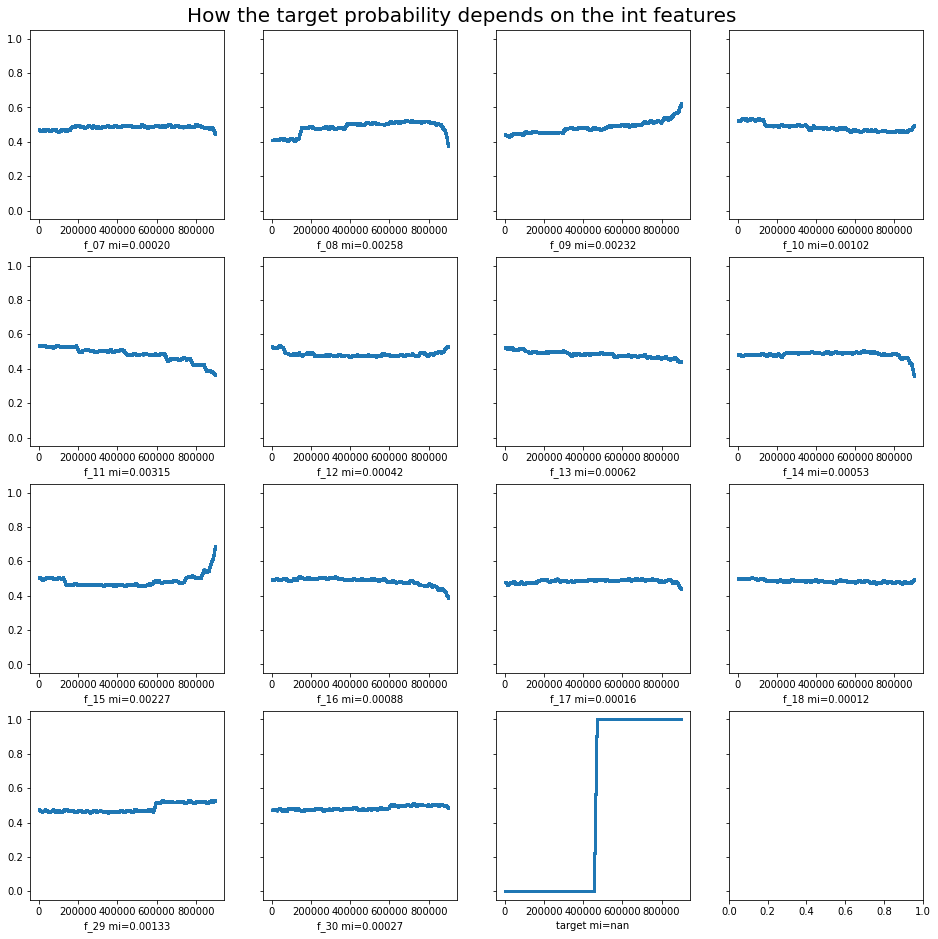

In [44]:
plot_mutual_info_diagram(train, int_list_train,
                         title='How the target probability depends on the int features')

In [45]:
# Check string feature f_27
train['f_27'].value_counts()

BBBBBBCJBC    12
BCBBBBCLBC    12
BBBBBBDPCB    10
BBBBBBDKBC    10
ADBBBACQBC    10
              ..
BFAFAADTCE     1
BBBDAACOAE     1
BBABAACGBB     1
BFAABAGSDB     1
BCAACADSCE     1
Name: f_27, Length: 741354, dtype: int64

In [46]:
pd.concat([train, test]).f_27.value_counts()

BAAACABLBB    15
ACBBAABCBC    15
BAAACABNBC    15
BCBBBBCDCC    14
BBBBBBCJBC    13
              ..
ABBAAAECEB     1
ACBCBAEOAE     1
BBBCBBCACG     1
BBACDAANGA     1
AAAJCBGQBA     1
Name: f_27, Length: 1181880, dtype: int64

In [47]:
# Check distribution of eachletter in string

for i in range(10):
    print(f'Position {i}')
    tg = train.groupby(train.f_27.str.get(i))
    temp = pd.DataFrame({'size': tg.size(), 'probability': tg.target.mean().round(2)})
    print(temp)
    print()

Position 0
        size  probability
f_27                     
A     451207         0.54
B     448793         0.44

Position 1
        size  probability
f_27                     
A     144762         0.58
B     245160         0.48
C     225931         0.49
D     149579         0.45
E      78807         0.43
F      35487         0.42
G      13713         0.41
H       4647         0.40
I       1361         0.40
J        410         0.38
K        113         0.39
L         25         0.28
M          3         0.67
N          2         1.00

Position 2
        size  probability
f_27                     
A     297840         0.53
B     602160         0.46

Position 3
        size  probability
f_27                     
A     160839         0.57
B     237218         0.48
C     210015         0.48
D     143633         0.45
E      81662         0.43
F      39504         0.44
G      17121         0.45
H       6473         0.47
I       2379         0.48
J        772         0.51
K        254     

In [ ]:
# Count unique characters in a string ans use that as a new feature

In [48]:
unique_characters = train.f_27.apply(lambda s: len(set(s))).rename('unique_characters')
tg = train.groupby(unique_characters)
temp = pd.DataFrame({'size': tg.size(), 'probability': tg.target.mean().round(2)})
print(temp)


                     size  probability
unique_characters                     
1                       1         0.00
2                    1092         0.09
3                   32164         0.09
4                  211165         0.48
5                  399974         0.49
6                  220715         0.48
7                   33698         0.91
8                    1185         0.91
9                       6         1.00


In [49]:
# Separate string in to 10 unique features
for df in [train, test]:
    for i in range(10):
        df[f'ch{i}'] = df.f_27.str.get(i).apply(ord) - ord('A')
    df["unique_characters"] = df.f_27.apply(lambda s: len(set(s)))

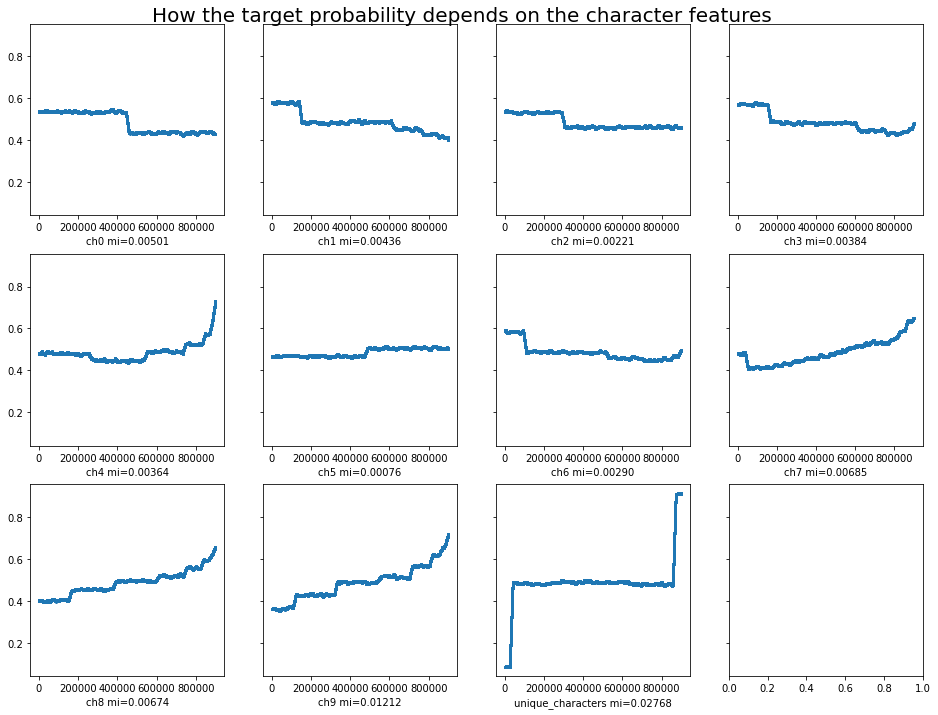

In [50]:
plot_mutual_info_diagram(train, 
                         [f for f in train.columns if f.startswith('ch')] + ['unique_characters'],
                         title='How the target probability depends on the character features')

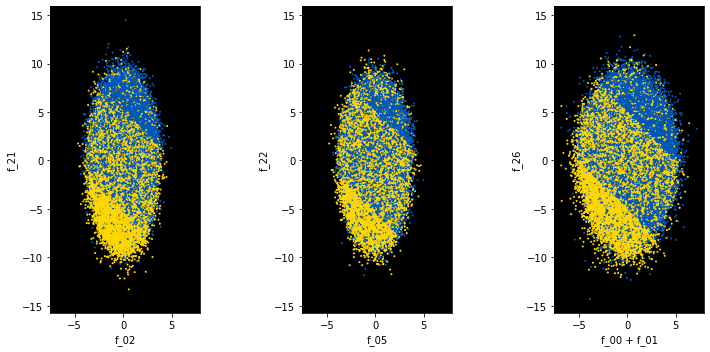

In [51]:
from matplotlib.colors import ListedColormap

plt.rcParams['axes.facecolor'] = 'k'
plt.figure(figsize=(11, 5))
cmap = ListedColormap(["#ffd700", "#0057b8"])
# target == 0 → yellow; target == 1 → blue

ax = plt.subplot(1, 3, 1)
ax.scatter(train['f_02'], train['f_21'], s=1,
           c=train.target, cmap=cmap)
ax.set_xlabel('f_02')
ax.set_ylabel('f_21')
ax.set_aspect('equal')
ax0 = ax

ax = plt.subplot(1, 3, 2, sharex=ax0, sharey=ax0)
ax.scatter(train['f_05'], train['f_22'], s=1,
           c=train.target, cmap=cmap)
ax.set_xlabel('f_05')
ax.set_ylabel('f_22')
ax.set_aspect('equal')

ax = plt.subplot(1, 3, 3, sharex=ax0, sharey=ax0)
ax.scatter(train['f_00'] + train['f_01'], train['f_26'], s=1,
           c=train.target, cmap=cmap)
ax.set_xlabel('f_00 + f_01')
ax.set_ylabel('f_26')
ax.set_aspect('equal')

plt.tight_layout(w_pad=1.0)
plt.savefig('three-projections.png')
plt.show()
plt.rcParams['axes.facecolor'] = '#0057b8' # blue

In [ ]:
#create new features using features from above diagram.

In [52]:
for df in [train, test]:
    df['i_02_21'] = (df.f_21 + df.f_02 > 5.2).astype(int) - (df.f_21 + df.f_02 < -5.3).astype(int)
    df['i_05_22'] = (df.f_22 + df.f_05 > 5.1).astype(int) - (df.f_22 + df.f_05 < -5.4).astype(int)
    i_00_01_26 = df.f_00 + df.f_01 + df.f_26
    df['i_00_01_26'] = (i_00_01_26 > 5.0).astype(int) - (i_00_01_26 < -5.0).astype(int)#

In [53]:
train.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,ch4,ch5,ch6,ch7,ch8,ch9,unique_characters,i_02_21,i_05_22,i_00_01_26
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,3,0,3,1,0,1,3,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2,0,3,2,4,1,5,0,0,0
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,0,1,2,10,0,3,6,0,0,0
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0,0,2,1,2,1,4,0,0,0
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,1,1,2,7,5,4,6,0,0,1


In [54]:
test.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,ch4,ch5,ch6,ch7,ch8,ch9,unique_characters,i_02_21,i_05_22,i_00_01_26
id,,,,,,,,,,,,,,,,,,,,,
900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,1,0,3,11,0,2,5,0,0,1
900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,1,0,4,6,2,1,6,0,0,0
900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,...,0,1,1,10,4,4,5,-1,0,0
900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,...,0,0,2,16,2,2,5,0,0,0
900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,...,1,1,3,0,1,5,5,0,0,0


In [ ]:

# Gradient boosting algorythm
scaler = StandardScaler()
y=train_df['target']
X=train_df.drop(['target'], axis=1)
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_test=pd.DataFrame(scaler.transform(test_df))